### La régression par arbre de décision est une technique d'apprentissage automatique utilisée pour modéliser des relations complexes entre des variables d'entrée et une variable cible continue. 

### Dataset: https://www.kaggle.com/gurdit559/canada-per-capita-income-single-variable-data-set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('canada_per_capita_income.csv')

In [3]:
X = data.iloc[:,:-1]

In [4]:
Y = data.iloc[:,-1]

In [5]:
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


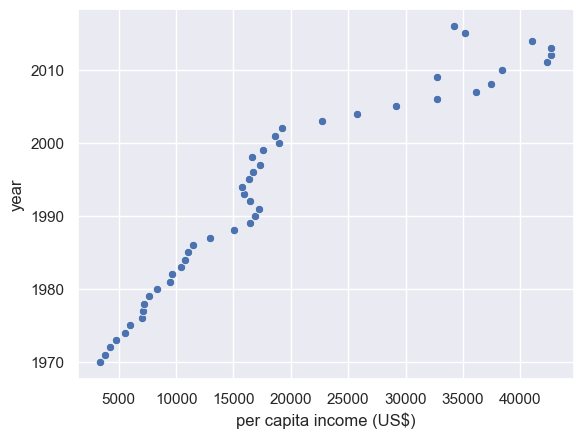

In [6]:
sns.scatterplot(data=data, x='per capita income (US$)', y='year')
plt.show()

### Train test split

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

### Model

In [9]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### Prédiction

In [10]:
y_pred = model.predict(X_test)

In [11]:
print(y_pred)

[15875.58673  17266.09769  37446.48609  25719.14715   3768.297935
  5576.514583 16622.67187  18601.39724  41039.8936   16369.31725 ]


### Comparaison

In [13]:
comparaison = pd.DataFrame()
comparaison['Actual'] = y_test
comparaison['predicted'] = y_pred

In [14]:
comparaison

,Actual,predicted
24,15755.820270,15875.586730
22,16412.083090,17266.097690
39,32755.176820,37446.486090
35,29198.055690,25719.147150
2,4251.175484,3768.297935
3,4804.463248,5576.514583
29,17581.024140,16622.671870
32,19232.175560,18601.397240
45,35175.188980,41039.893600
26,16699.826680,16369.317250


### Evaluation

In [15]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9283605684543206

# Visualization

1. Visualize model
2. Display decision tree 
3. Visit & understand: https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [16]:
vals = np.arange(1950,2050,2)
model.predict(vals.reshape(len(vals),1))

array([ 3399.299037,  3399.299037,  3399.299037,  3399.299037,
        3399.299037,  3399.299037,  3399.299037,  3399.299037,
        3399.299037,  3399.299037,  3399.299037,  3768.297935,
        5576.514583,  7062.131392,  7247.967035,  8355.96812 ,
        9619.438377, 10790.32872 , 11482.89153 , 15080.28345 ,
       16838.6732  , 17266.09769 , 15875.58673 , 16369.31725 ,
       16622.67187 , 18987.38241 , 18601.39724 , 25719.14715 ,
       32738.2629  , 37446.48609 , 38420.52289 , 42665.25597 ,
       41039.8936  , 34229.19363 , 34229.19363 , 34229.19363 ,
       34229.19363 , 34229.19363 , 34229.19363 , 34229.19363 ,
       34229.19363 , 34229.19363 , 34229.19363 , 34229.19363 ,
       34229.19363 , 34229.19363 , 34229.19363 , 34229.19363 ,
       34229.19363 , 34229.19363 ])

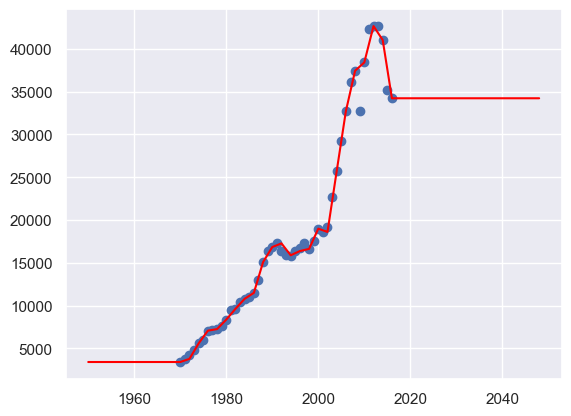

In [17]:
plt.scatter(X,Y)
plt.plot(vals, model.predict(vals.reshape(len(vals),1)), color='red')
plt.show()